In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

In [32]:
df = pd.read_csv(r"../logs/focus_log.csv")

In [33]:
# Convert time columns to datetime objects
df["Start Time"] = pd.to_datetime(df["Start Time"], format="%H:%M:%S")
df["End Time"] = pd.to_datetime(df["End Time"], format="%H:%M:%S")

# Map status to numeric values
status_map = {
    "Focused": 0,
    "Not Focused": 1,
    "No Eyes Detected": 2
}
df["Status Value"] = df["Status"].map(status_map)


In [34]:
# Create a list of timestamps and status values for a step-style plot
timestamps = []
values = []

for _, row in df.iterrows():
    timestamps.append(row["Start Time"])
    values.append(row["Status Value"])
    
    timestamps.append(row["End Time"])
    values.append(row["Status Value"])

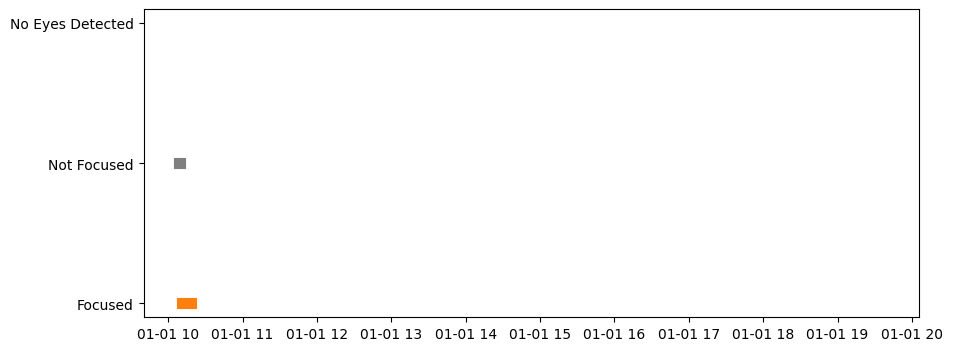

In [41]:
# Create lists for plotting horizontal bars
bars = []
for idx, row in df.iterrows():
    bars.append((row['Start Time'], row['End Time'], row['Status']))

fig, ax = plt.subplots(figsize=(10, 4))

for start, end, status_num in bars:
    ax.plot([start, end], [status_num, status_num], linewidth=8)

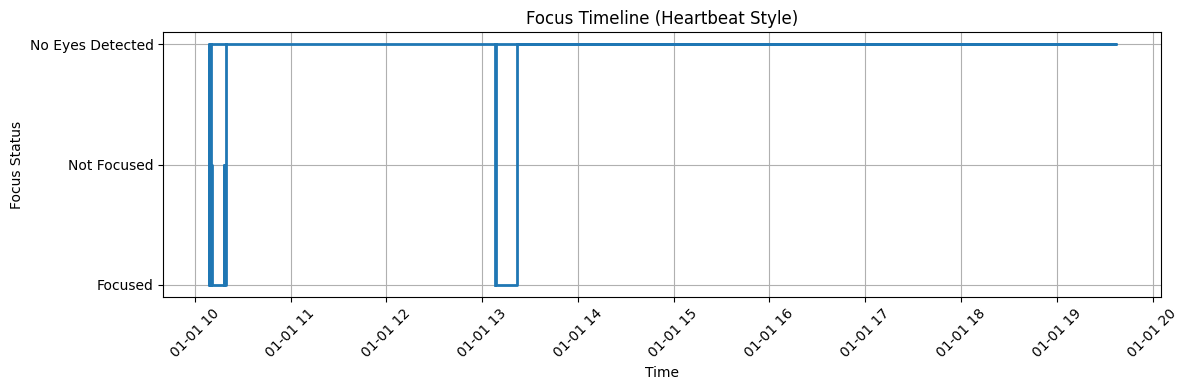

In [42]:
plt.figure(figsize=(12, 4))
plt.plot(timestamps, values, drawstyle='steps-post', linewidth=2)

# Format axes
plt.yticks([0, 1, 2], ["Focused", "Not Focused", "No Eyes Detected"])
plt.xticks(rotation=45)
plt.title("Focus Timeline (Heartbeat Style)")
plt.xlabel("Time")
plt.ylabel("Focus Status")
plt.grid(True)
plt.tight_layout()
plt.show()
